# **Ford GoBike Trip Data**
by Shahad Alsulami

## **Investigation Overview**


> The goal of this investigation is to understand how trip duration varies based on factors such as age, user type, gender, and day of the week. This helps reveal patterns in bike usage and user behavior


## **Dataset Overview and Executive Summary**

>The dataset contains bike trip records, Key findings from the analysis include:  
> - People aged 30–50 tend to have the longest trip durations compared to other ages
> - Customers generally take longer trips than subscribers
> - Females tend to have slightly longer trip durations than males across all user types and days
> - The longest trips occur on weekends (Saturday and Sunday) for both genders
> - Trip durations are generally shorter on weekdays
> - The under 20 age group is not present in the data

In [12]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [37]:
# load data
df_clean = pd.read_csv('cleanforsdgobike.csv')

## **(Visualization 1)**
### **How does trip duration vary by age and user type?**

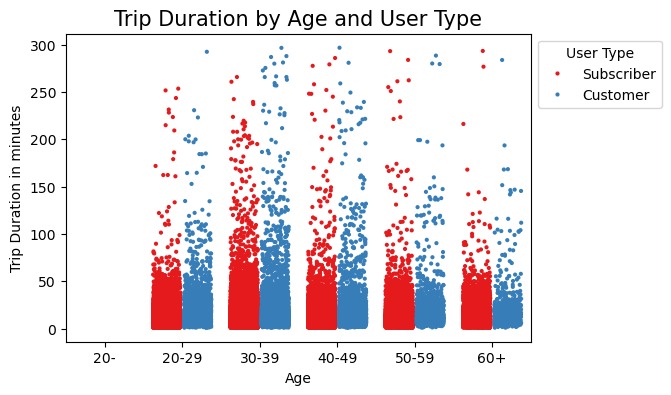

In [220]:
# Divide ages into groups
df_clean['age_group'] = pd.cut(df_clean['age'], 
                               bins=[0, 20, 30, 40, 50, 60, 100], 
                               labels=['20-', '20-29', '30-39', '40-49', '50-59', '60+'])

# Creae a strip plot plot to show the relationship between trip duration, age and user type
plt.figure(figsize=(6,4))
sns.stripplot(
    data=df_clean, 
    x='age_group' , 
    y='duration_min', 
    hue='user_type',  
    palette='Set1',
    dodge=True,
    jitter=0.35,
    size=3 
)
plt.title('Trip Duration by Age and User Type', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Trip Duration in minutes')
plt.legend(title='User Type', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

- The under 20 age group is missing, possibly due to service restrictions

- Ages 30–49 have the longest trip durations compared to other ages

- Trip duration decreases with age, possibly due to comfort or  health reasons

- Customers tend to take longer trips than subscribers because subscribers typically use the service daily for short, focused trips, and customers use it for tourism and longer rides

## **(Visualization 2)**
### **Does gender play a role in trip duration for different user types?**

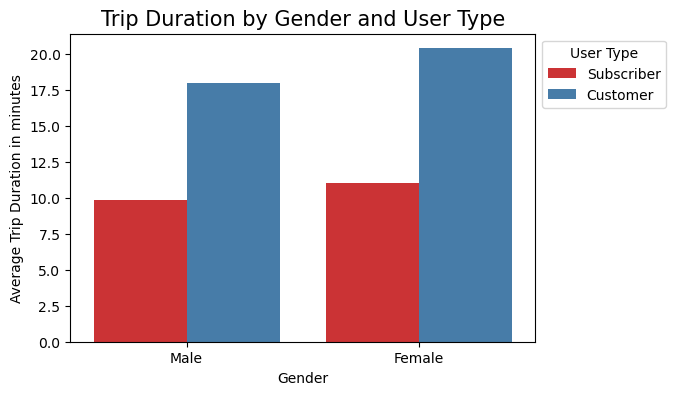

In [222]:
# Creae a bar plot to show the relationship between trip duration, gender and user type

plt.figure(figsize=(6,4))
sns.barplot(data=df_clean, x='member_gender', y='duration_min', hue='user_type',
            order=['Male', 'Female'],
            palette='Set1',
            errorbar=None)
plt.title('Trip Duration by Gender and User Type', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration in minutes')
plt.legend(title='User Type', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

- Females tend to have longer trip durations than males
  
- Customers have higher average trip durations than Subscribers across both genders

## **(Visualization 3)**
### **Which days see the longest trips, and does this differ by gender?**

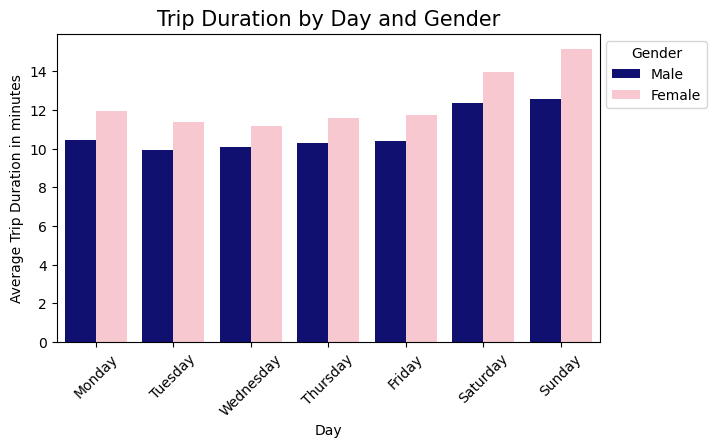

In [199]:
# Define the order of days
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creae a bar plot to show the relationship between trip duration, day and gender
plt.figure(figsize=(7,4))
sns.barplot(data=df_clean[(df_clean['member_gender'] != 'Unknown') & (df_clean['member_gender'] != 'Other')], 
            x='day_of_week', y='duration_min', hue='member_gender', order=order_days,
            palette={'Male': 'navy', 'Female': 'pink'},
            errorbar=None) 
plt.xlabel('Day')
plt.ylabel('Average Trip Duration in minutes')
plt.title('Trip Duration by Day and Gender',fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

- The longest trips happen on Saturday and Sunday for both genders, as people usually have more free time on weekends

- On weekdays, trips are generally shorter for everyone, since most people use bikes for commuting to work or school.

- Across all days, females tend to have longer trip durations than males